In [1]:
!pip install pandas matplotlib numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

  Using cached matplotlib-3.9.2-cp39-cp39-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp39-cp39-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-10.4.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 3.8 MB/s eta 0:00:00a 0:00:01
Using cached matplotlib-3.9.2-cp39-cp39-macosx_11_0_arm64.whl (7.8 MB)
Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl (249 kB)
Using cached cycler-0.12.1-

In [536]:
df_repositories = pd.read_csv('CSVs Used//final_data_curated - final_data_curated_categorized.csv')
df_repositories['core_functionality'] = df_repositories['core_functionality'].str.strip()

df_users = pd.read_csv('CSVs Used//users_details.csv')

In [21]:
df_repositories.head()

,Unnamed: 0,html_url,name,full_name,description,topics,created_at,updated_at,pushed_at,size,...,hf_or_clf,comments,cyclomatic_complexity,cognitive_complexity,libraries,issue_type,bot_vs_human_ci,bot_vs_human_cpr,ttfr_median,ttfr_average
0,0,https://github.com/klknn/kdr,kdr,klknn/kdr,klknn dplug repository,"['audio-processing', 'audio-units', 'dlang', '...",2022-09-24T06:38:43Z,2023-04-04T18:36:29Z,2023-06-25T15:29:30Z,3337,...,Header files,19.10%,550,533,NaN,"bug, enhancement",Human,Human,3:35 h,3:35 h
1,5,https://github.com/hansen-audio/renegate-fx,renegate-fx,hansen-audio/renegate-fx,VST 3 Trancegate Effect,"['audio', 'audio-processing', 'cmake', 'cpp', ...",2021-05-16T09:57:18Z,2023-08-26T22:27:02Z,2023-08-06T20:35:13Z,151,...,Header files,52.73%,667,569,NaN,NaN,NaN,NaN,NaN,NaN
2,7,https://github.com/Wasted-Audio/wstd-eq,wstd-eq,Wasted-Audio/wstd-eq,Simple nasty EQ plugin.,"['clap', 'dpf', 'imgui', 'jack', 'lv2', 'plugi...",2023-01-31T21:19:12Z,2023-09-02T03:23:21Z,2023-09-06T11:39:18Z,164,...,Header files,9.32%,140,74,NaN,help wanted,NaN,NaN,NaN,NaN
3,11,https://github.com/AnClark/Minaton-XT,Minaton-XT,AnClark/Minaton-XT,"DPF port of Minaton, an analogue style synthes...","['audio', 'clap', 'lv2', 'plugin', 'synthesize...",2023-01-21T05:58:23Z,2023-08-24T05:00:29Z,2023-09-14T12:52:50Z,2610,...,Header files,18.21%,231,191,NaN,NaN,NaN,NaN,NaN,NaN
4,12,https://github.com/xivilay/scale-remapper,scale-remapper,xivilay/scale-remapper,Routes white keys from midi-input to chosen sc...,"['blocks', 'lumi', 'lumi-keys', 'lv2', 'midi',...",2021-11-15T19:39:02Z,2023-04-29T01:17:51Z,2023-02-25T16:09:07Z,259,...,Header files,0.00%,110,82,NaN,enhancement,NaN,NaN,NaN,NaN


In [22]:
df_repositories['core_functionality'].value_counts()

core_functionality
effect                        219
virtual instrument             76
virtual instrument, effect      4
Name: count, dtype: int64

In [204]:
virtual_instruments = df_repositories[df_repositories['core_functionality'] == "virtual instrument"]
effects = df_repositories[df_repositories['core_functionality'] == "effect"]

In [293]:
effects_ = pd.DataFrame(effects['functionality'].value_counts())
effects_['functionality'] = effects_.index
threashold = 4
others= int(effects_[effects_['count'] < threashold].sum().iloc[0])
print(f"Others effects: {others}")
effects_['functionality'] = effects_['functionality'].apply(lambda x: x.split('-')[1].strip().title())
effects_.reset_index(drop=True, inplace=True)
# filter to get only the effects higher than the threashold.
effects_ = effects_[effects_['count'] >= threashold]


normalized_effects = effects_.copy()
normalized_effects['proportion'] = normalized_effects['count'] / normalized_effects['count'].sum()
normalized_effects['waffle_blocks'] = np.round(normalized_effects['proportion'] * 100).astype(int)
normalized_effects = normalized_effects.drop(['count', 'proportion'], axis=1)
normalized_effects.set_index('functionality', inplace=True)

# 
instruments_ = pd.DataFrame(virtual_instruments['functionality'].value_counts())
instruments_['functionality'] = instruments_.index
threashold = 2
others= int(instruments_[instruments_['count'] < threashold].sum().iloc[0])
print(f"Others instruments: {others}")
instruments_['functionality'] = instruments_['functionality'].apply(lambda x: x.split('-')[1].strip().title())
instruments_.reset_index(drop=True, inplace=True)
# filter to get only the effects higher than the threashold.
instruments_ = instruments_[instruments_['count'] >= threashold]


normalized_instruments = instruments_.copy()
normalized_instruments['proportion'] = normalized_instruments['count'] / normalized_instruments['count'].sum()
normalized_instruments['waffle_blocks'] = np.round(normalized_instruments['proportion'] * 100).astype(int)
normalized_instruments = normalized_instruments.drop(['count', 'proportion'], axis=1)
normalized_instruments.set_index('functionality', inplace=True)

normalized_instruments

Others effects: 169
Others instruments: 9


,waffle_blocks
functionality,
Synthesizer,78
Sampler,12
Piano,4
Drums,3
Strings,3


In [267]:
virtual_instruments['functionality'].value_counts()

functionality
virtual instrument - synthesizer               52
virtual instrument - sampler                    8
virtual instrument - piano                      3
virtual instrument - drums                      2
virtual instrument - strings                    2
virtual instrument - euclidean drum machine     1
virtual instrument - Synthesizer wavetable      1
virtual instrument - harp                       1
virtual instrument - arpeggio generator         1
virtual instrument - organ                      1
virtual instrument - guitar                     1
virtual instrument - chords generator           1
virtual instrument - noise generator            1
virtual instrument - abit                       1
Name: count, dtype: int64

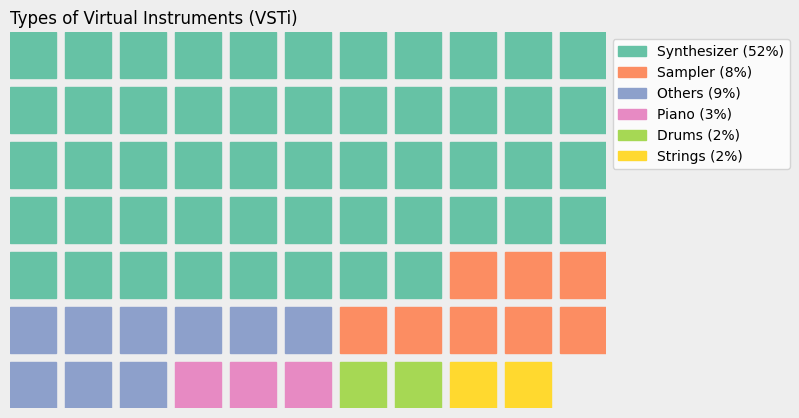

In [173]:
!pip install pywaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle

# data = virtual_instruments['functionality'].value_counts().to_dict()
data = {
    'Synthesizer': 52, 'Sampler': 8, 'Others': 9, 'Piano': 3, 'Drums': 2, 'Strings': 2,
}

fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    values=data,
    # colors=["#C1D82F", "#00A4E4", "#FBB034", '#6A737B', '#6A737B', '#6A727B', '#6A737A', '#3A737B', '#6A787B', '#6A637B', '#6A637B', '#6A637B', '#6A637B','#6A637B'],
    title={'label': 'Types of Virtual Instruments (VSTi)', 'loc': 'left'},
    labels=[f"{k} ({v}%)" for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    # legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    starting_location='NW',
    vertical=True,
    block_arranging_style='snake',
    figsize=(8, 5)
)
fig.set_facecolor('#EEEEEE')
plt.show()

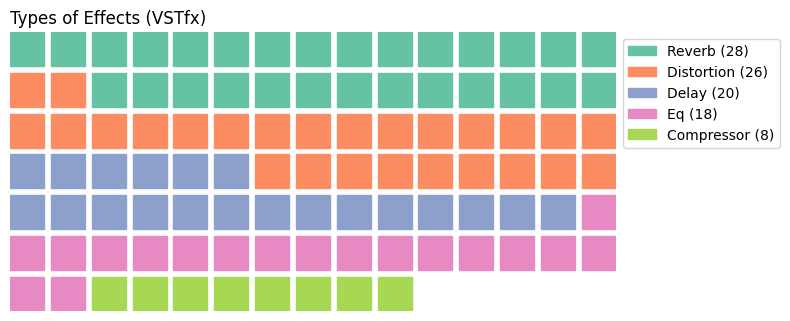

In [262]:
!pip install pywaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle

effects_dct = normalized_effects.to_dict()
effects_dct = effects_dct['waffle_blocks']

fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    values=effects_dct,
    # colors=["#C1D82F", "#00A4E4", "#FBB034", '#6A737B', '#6A737B', '#6A727B', '#6A737A', '#3A737B', '#6A787B', '#6A637B', '#6A637B', '#6A637B', '#6A637B','#6A637B'],
    title={'label': 'Types of Effects (VSTfx)', 'loc': 'left'},
    labels=[f"{k} ({v})" for k, v in effects_dct.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    # legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    starting_location='NW',
    vertical=True,
    block_arranging_style='snake',
    figsize=(8, 5)
)
# fig.set_facecolor('#EEEEEE')
plt.show()

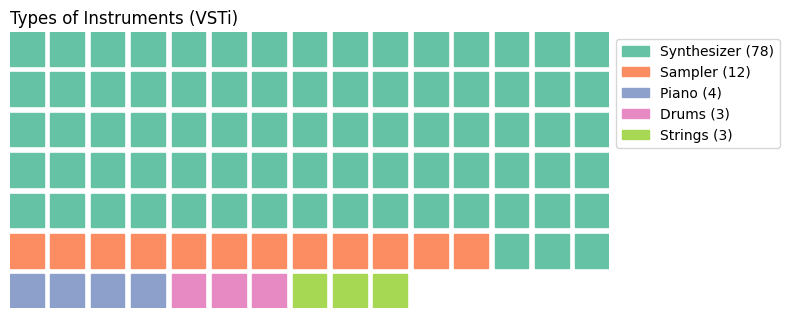

In [270]:
!pip install pywaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle

instruments_dct = normalized_instruments.to_dict()
instruments_dct = instruments_dct['waffle_blocks']

fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    values=instruments_dct,
    # colors=["#C1D82F", "#00A4E4", "#FBB034", '#6A737B', '#6A737B', '#6A727B', '#6A737A', '#3A737B', '#6A787B', '#6A637B', '#6A637B', '#6A637B', '#6A637B','#6A637B'],
    title={'label': 'Types of Instruments (VSTi)', 'loc': 'left'},
    labels=[f"{k} ({v})" for k, v in instruments_dct.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    # legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    starting_location='NW',
    vertical=True,
    block_arranging_style='snake',
    figsize=(8, 5)
)
# fig.set_facecolor('#EEEEEE')
plt.show()

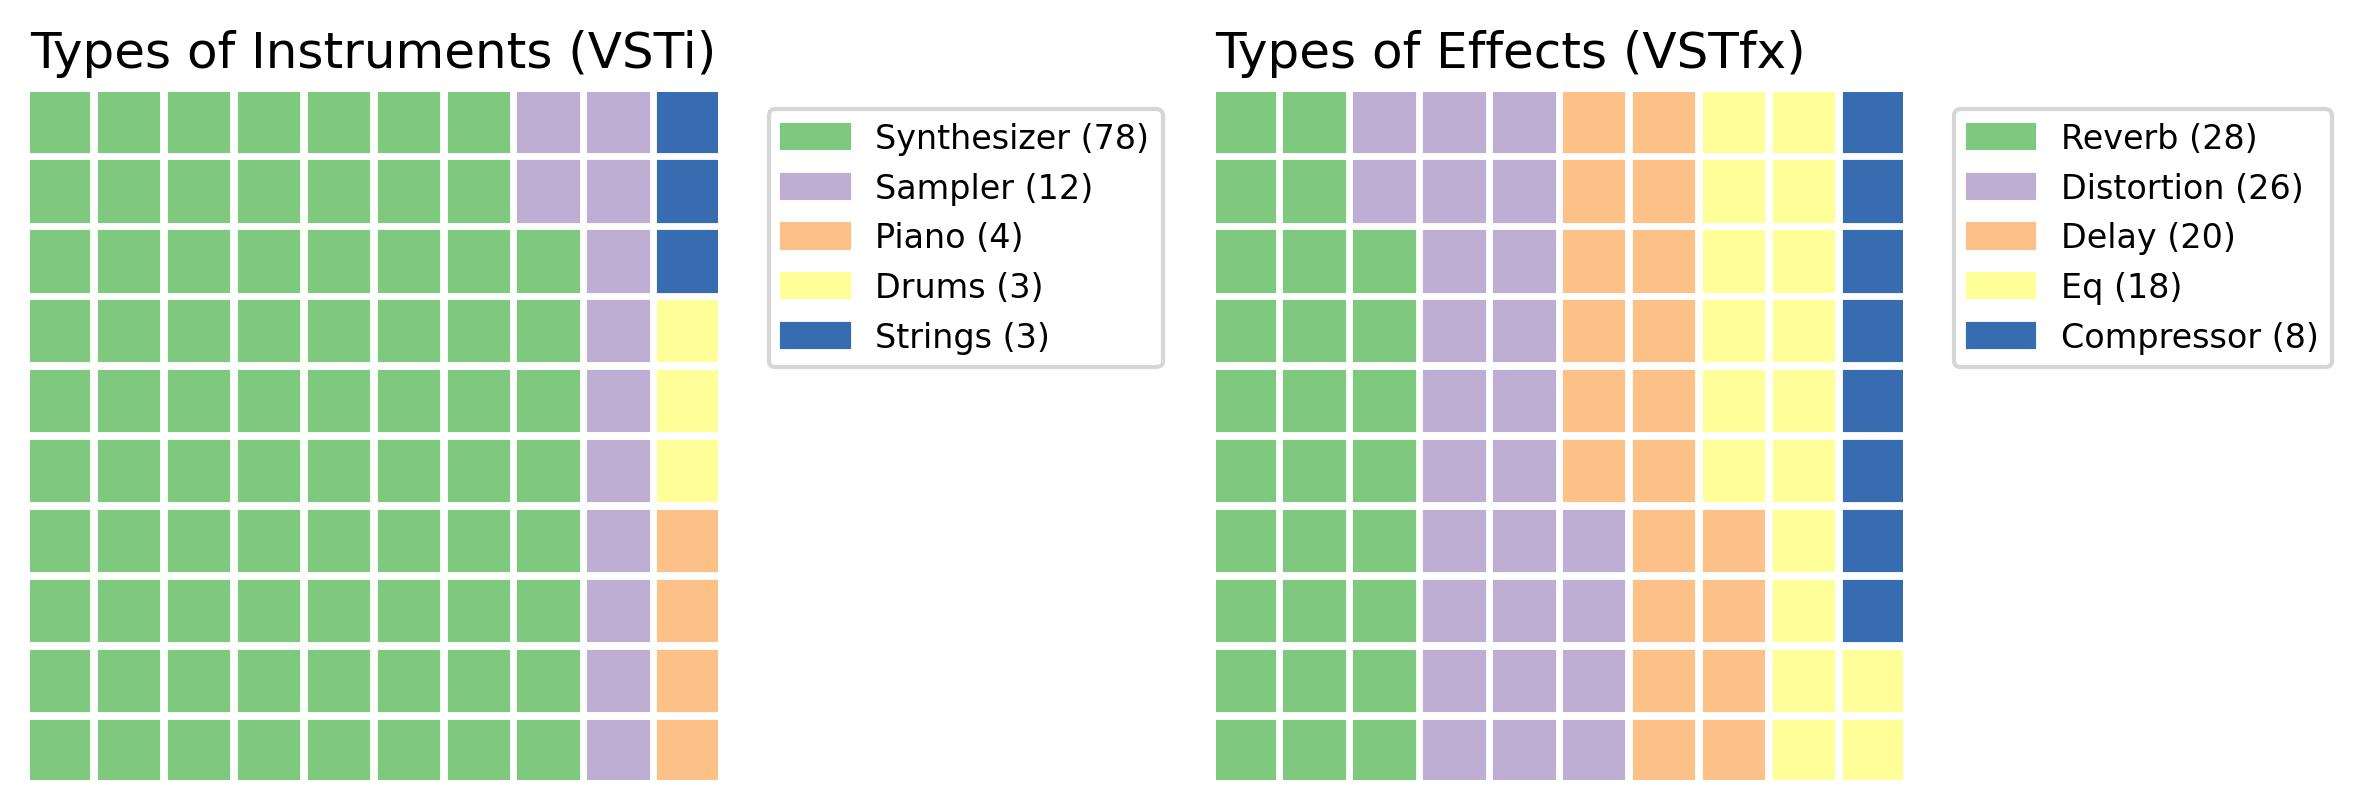

In [292]:
import pandas as pd
# data = pd.DataFrame(data).set_index('labels')

data2 = pd.DataFrame(
    {
        'labels': ['Car', 'Truck', 'Motorcycle'],
        'Factory B': [22147, 6678, 2156],
    },
).set_index('labels')

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        121: {
            'values': instruments_dct,  # Convert actual number to a reasonable block number
            'labels': [f"{k} ({v})" for k, v in instruments_dct.items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Types of Instruments (VSTi)', 'loc': 'left', 'fontsize': 12}
        },
        122: {
            'values': effects_dct,
            'labels': [f"{k} ({v})" for k, v in effects_dct.items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Types of Effects (VSTfx)', 'loc': 'left', 'fontsize': 12}
        }
    },
    rows=10,  # Outside parameter applied to all subplots, same as below
    cmap_name="Accent",  # Change color with cmap
    rounding_rule='ceil',  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(8, 4),
    dpi=300
)

# fig.suptitle('VST Plugins Categories', fontsize=14, fontweight='bold')
# fig.supxlabel('1 block = 1000 vehicles', fontsize=8, x=0.14)
fig.set_facecolor('#FFFFFF')

plt.show()
fig.savefig('waffle.png')

In [46]:
data

{'virtual instrument - synthesizer': 52,
 'virtual instrument - sampler': 8,
 'virtual instrument - piano': 3,
 'virtual instrument - drums': 2,
 'virtual instrument - strings': 2,
 'virtual instrument - euclidean drum machine': 1,
 'virtual instrument - Synthesizer wavetable': 1,
 'virtual instrument - harp': 1,
 'virtual instrument - arpeggio generator': 1,
 'virtual instrument - organ': 1,
 'virtual instrument - guitar': 1,
 'virtual instrument - chords generator': 1,
 'virtual instrument - noise generator': 1,
 'virtual instrument - abit': 1}

In [294]:
df_repositories.head()

,Unnamed: 0,html_url,name,full_name,description,topics,created_at,updated_at,pushed_at,size,...,hf_or_clf,comments,cyclomatic_complexity,cognitive_complexity,libraries,issue_type,bot_vs_human_ci,bot_vs_human_cpr,ttfr_median,ttfr_average
0,0,https://github.com/klknn/kdr,kdr,klknn/kdr,klknn dplug repository,"['audio-processing', 'audio-units', 'dlang', '...",2022-09-24T06:38:43Z,2023-04-04T18:36:29Z,2023-06-25T15:29:30Z,3337,...,Header files,19.10%,550,533,NaN,"bug, enhancement",Human,Human,3:35 h,3:35 h
1,5,https://github.com/hansen-audio/renegate-fx,renegate-fx,hansen-audio/renegate-fx,VST 3 Trancegate Effect,"['audio', 'audio-processing', 'cmake', 'cpp', ...",2021-05-16T09:57:18Z,2023-08-26T22:27:02Z,2023-08-06T20:35:13Z,151,...,Header files,52.73%,667,569,NaN,NaN,NaN,NaN,NaN,NaN
2,7,https://github.com/Wasted-Audio/wstd-eq,wstd-eq,Wasted-Audio/wstd-eq,Simple nasty EQ plugin.,"['clap', 'dpf', 'imgui', 'jack', 'lv2', 'plugi...",2023-01-31T21:19:12Z,2023-09-02T03:23:21Z,2023-09-06T11:39:18Z,164,...,Header files,9.32%,140,74,NaN,help wanted,NaN,NaN,NaN,NaN
3,11,https://github.com/AnClark/Minaton-XT,Minaton-XT,AnClark/Minaton-XT,"DPF port of Minaton, an analogue style synthes...","['audio', 'clap', 'lv2', 'plugin', 'synthesize...",2023-01-21T05:58:23Z,2023-08-24T05:00:29Z,2023-09-14T12:52:50Z,2610,...,Header files,18.21%,231,191,NaN,NaN,NaN,NaN,NaN,NaN
4,12,https://github.com/xivilay/scale-remapper,scale-remapper,xivilay/scale-remapper,Routes white keys from midi-input to chosen sc...,"['blocks', 'lumi', 'lumi-keys', 'lv2', 'midi',...",2021-11-15T19:39:02Z,2023-04-29T01:17:51Z,2023-02-25T16:09:07Z,259,...,Header files,0.00%,110,82,NaN,enhancement,NaN,NaN,NaN,NaN


In [488]:
import ast

df_intermediary_topic = pd.DataFrame(df_repositories['topics'])
df_intermediary_topic['topics'] = df_intermediary_topic['topics'].apply(ast.literal_eval)
df_topic = df_intermediary_topic.explode('topics')
df_topic['topics'] = df_topic['topics'].apply(lambda x: x.replace('juce-framework','juce'))
df_topic['topics'] = df_topic['topics'].apply(lambda x: x.replace('juce','juce-framework'))
df_topic['topics'] = df_topic['topics'].apply(lambda x: x.replace('vst3-plugin','vst3'))
df_topic['topics'] = df_topic['topics'].apply(lambda x: x.replace('vst-plugins','vst-plugin'))
df_topic['topics'] = df_topic['topics'].apply(lambda x: x.upper() if len(x) <= 4 else x.title())

df_topic = df_topic['topics'].value_counts()[:20].reset_index()
df_topic.columns = ['Topics', 'Repositories Count']
df_topic

,Topics,Repositories Count
0,VST,186
1,VST3,176
2,Juce-Framework,128
3,Audio,84
4,Vst-Plugin,61
5,Plugin,59
6,Audio-Processing,50
7,DSP,48
8,Synthesizer,41
9,Audio-Plugin,36


In [493]:
from datetime import date
import datetime
till_5_years = pd.to_datetime(date.today() - datetime.timedelta(days=1827))

df_intermediary_topic_5_years = pd.DataFrame(df_repositories[['topics', 'created_at']])
df_intermediary_topic_5_years['topics'] = df_intermediary_topic_5_years['topics'].apply(lambda x: x.replace('juce-framework','juce'))
df_intermediary_topic_5_years['topics'] = df_intermediary_topic_5_years['topics'].apply(lambda x: x.replace('juce','juce-framework'))
df_intermediary_topic_5_years['topics'] = df_intermediary_topic_5_years['topics'].apply(lambda x: x.replace('vst3-plugin','vst3'))
df_intermediary_topic_5_years['topics'] = df_intermediary_topic_5_years['topics'].apply(lambda x: x.replace('vst-plugins','vst-plugin'))

df_intermediary_topic_5_years['created_at'] =  pd.to_datetime(df_intermediary_topic_5_years['created_at'].str.slice(0,10),format='%Y-%m-%d')
df_intermediary_topic_5_years = df_intermediary_topic_5_years.sort_values(['created_at'])

df_intermediary_topic_5_years = df_intermediary_topic_5_years[df_intermediary_topic_5_years['created_at']>=till_5_years]
df_intermediary_topic_5_years['topics'] = df_intermediary_topic_5_years['topics'].apply(ast.literal_eval)

df_topic_5_years = df_intermediary_topic_5_years.explode('topics')
df_topic_5_years['topics'] = df_topic_5_years['topics'].apply(lambda x: x.upper() if len(x) <= 4 else x.title())
df_topic2_5_years = df_topic_5_years['topics'].value_counts()[:20].reset_index()
df_topic2_5_years.columns = ['Topics', 'Repositories Count']
df_topic2_5_years

,Topics,Repositories Count
0,VST3,142
1,VST,112
2,Juce-Framework,100
3,Audio,62
4,Plugin,48
5,Audio-Processing,42
6,Vst-Plugin,38
7,DSP,36
8,Audio-Plugin,24
9,Synthesizer,24


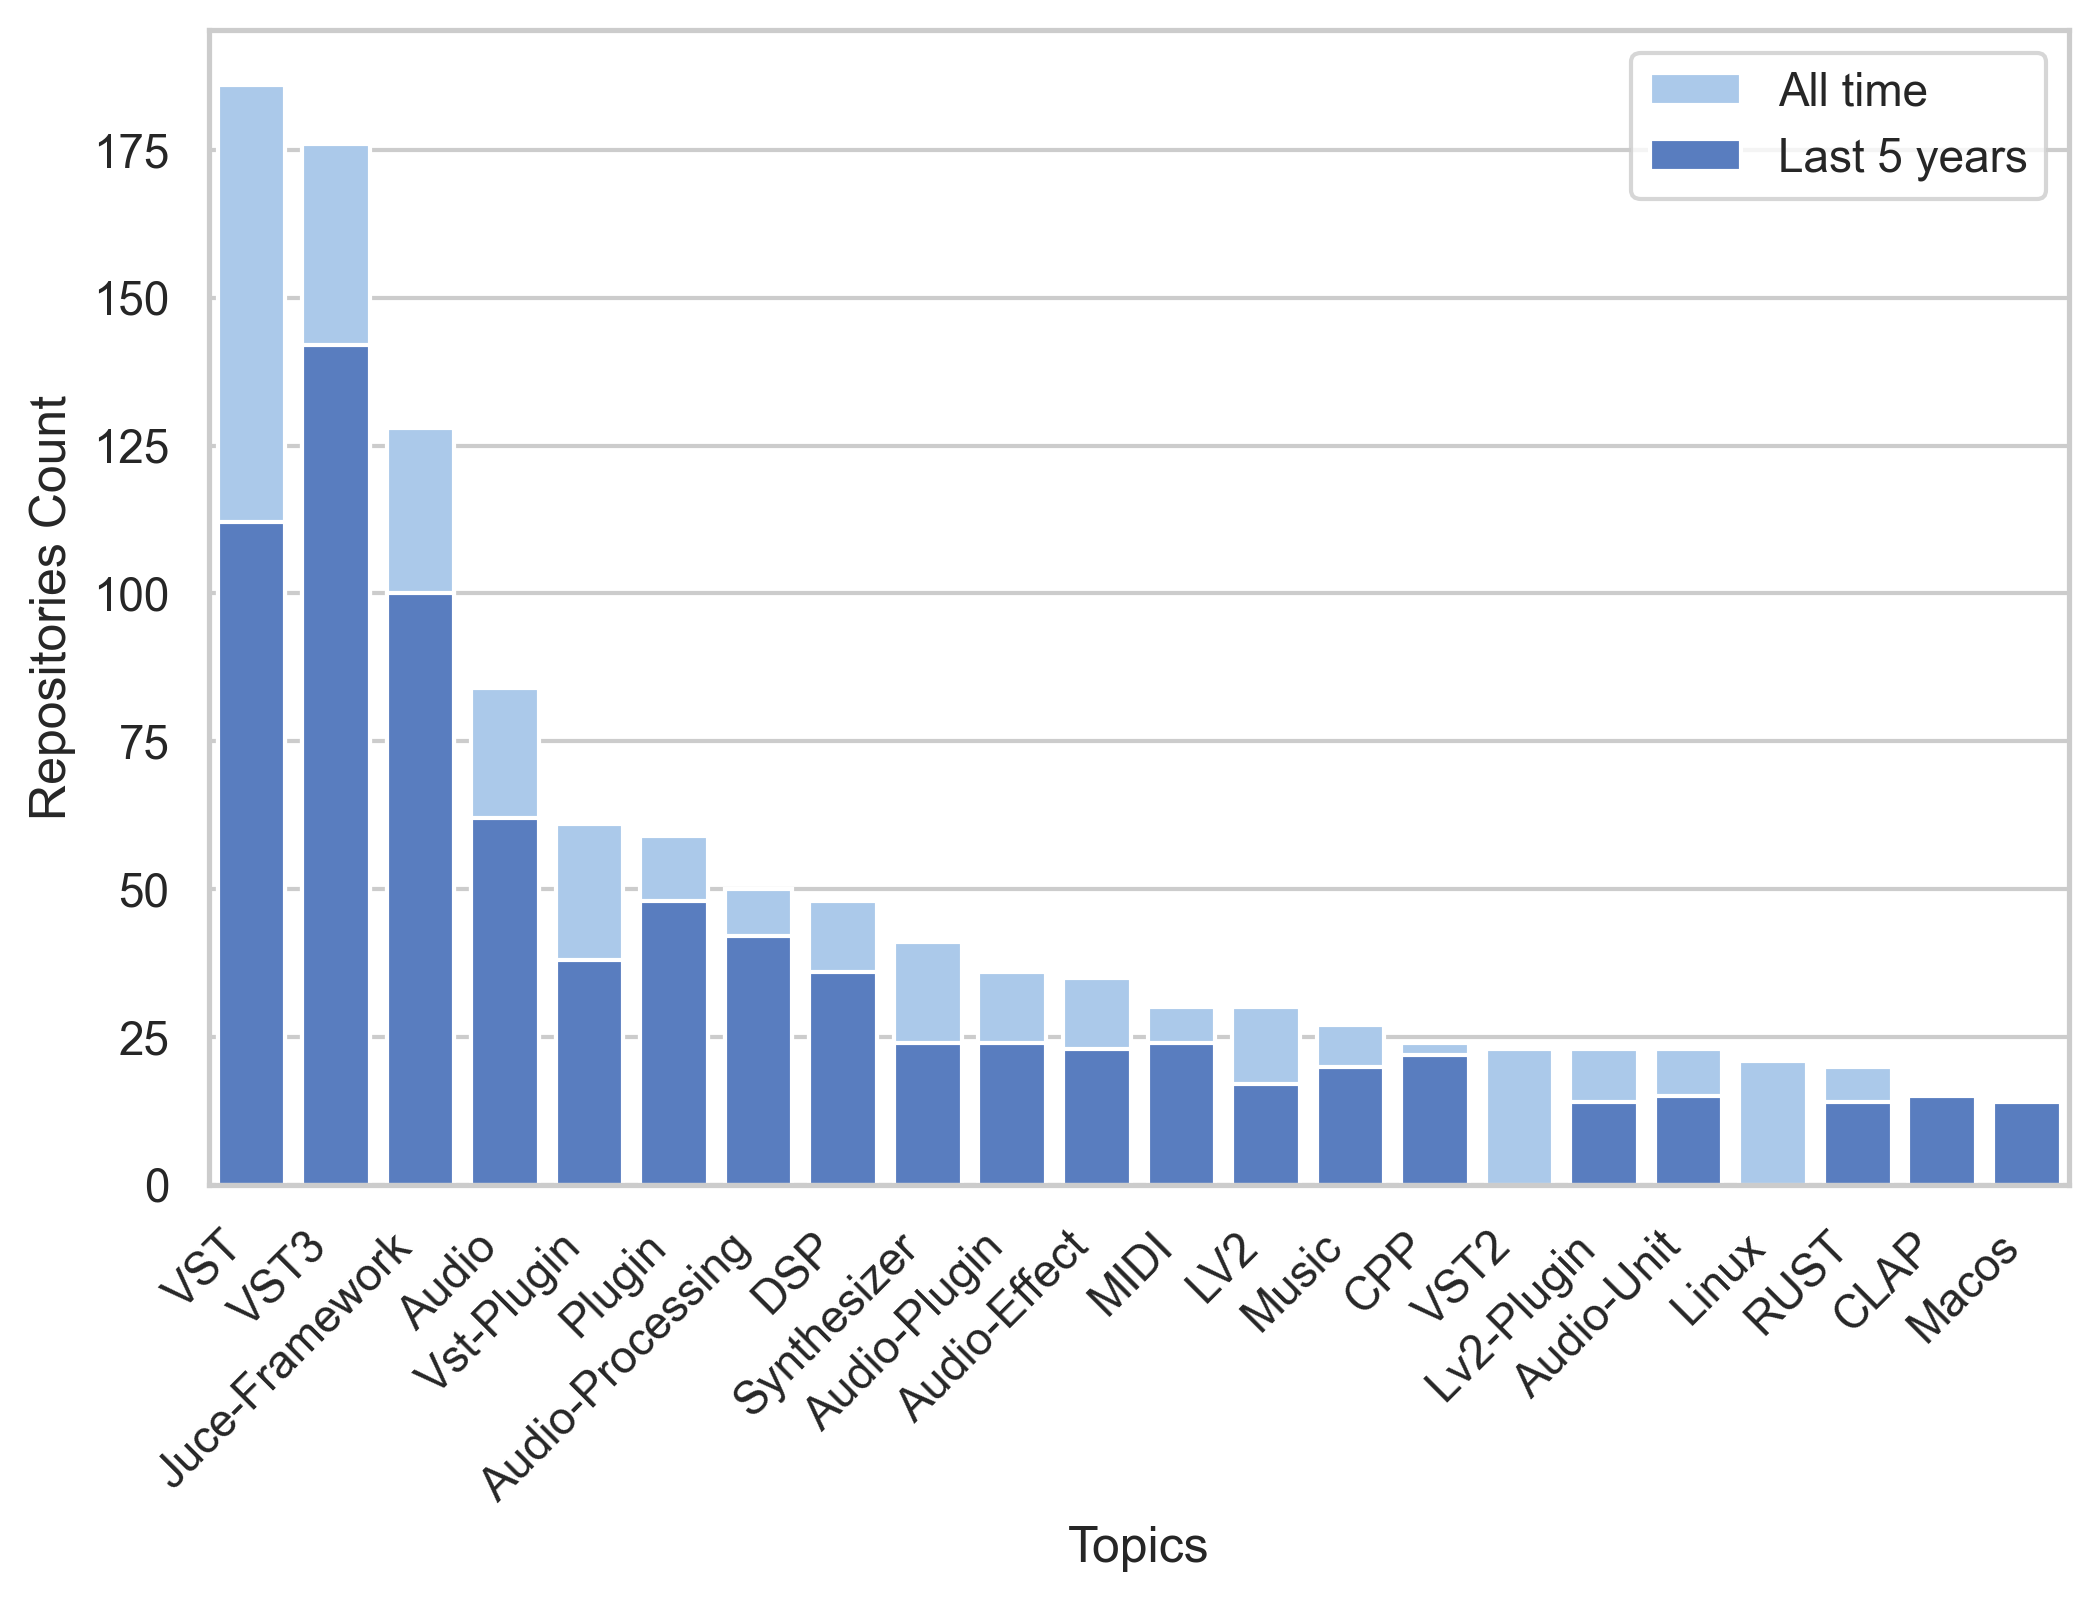

In [494]:
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 5), dpi=300)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Topics", y="Repositories Count", data=df_topic,
            label="All time", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Topics", y="Repositories Count", data=df_topic2_5_years,
            label="Last 5 years", color="b")

# Add a legend and informative axis label
# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(ylabel="",
#        xlabel="Topics used across repositories",)
plt.xticks(rotation=45, ha='right')
# sns.despine(left=True, bottom=False)
f.savefig('barplot_topics.png',bbox_inches = 'tight')

In [358]:
df_created_at_count = pd.DataFrame(df_repositories[['name','created_at']])
df_created_at_count['created_at'] = pd.to_datetime(df_created_at_count['created_at'].str.slice(0,10),format='%Y-%m-%d')
df_created_at_count['year'] = df_created_at_count['created_at'].dt.year
# df_created_at_count['count_per_year'] = df_created_at_count.groupby(year)['created_at'].transform('size')

# df_created_at_count['functionality'] = df_created_at_count.index

df_created_at_count

,name,created_at,year
0,kdr,2022-09-24,2022
1,renegate-fx,2021-05-16,2021
2,wstd-eq,2023-01-31,2023
3,Minaton-XT,2023-01-21,2023
4,scale-remapper,2021-11-15,2021
...,...,...,...
294,fxp,2022-04-21,2022
295,vst_plugin,2020-07-11,2020
296,Topiary-Riffz,2019-11-17,2019
297,UQLRF-500,2020-12-25,2020


In [373]:
sns.catplot(
    data=df_repositories['age'],
    kind="violin",bw_adjust=.5, cut=0
)

KeyError: 'age'

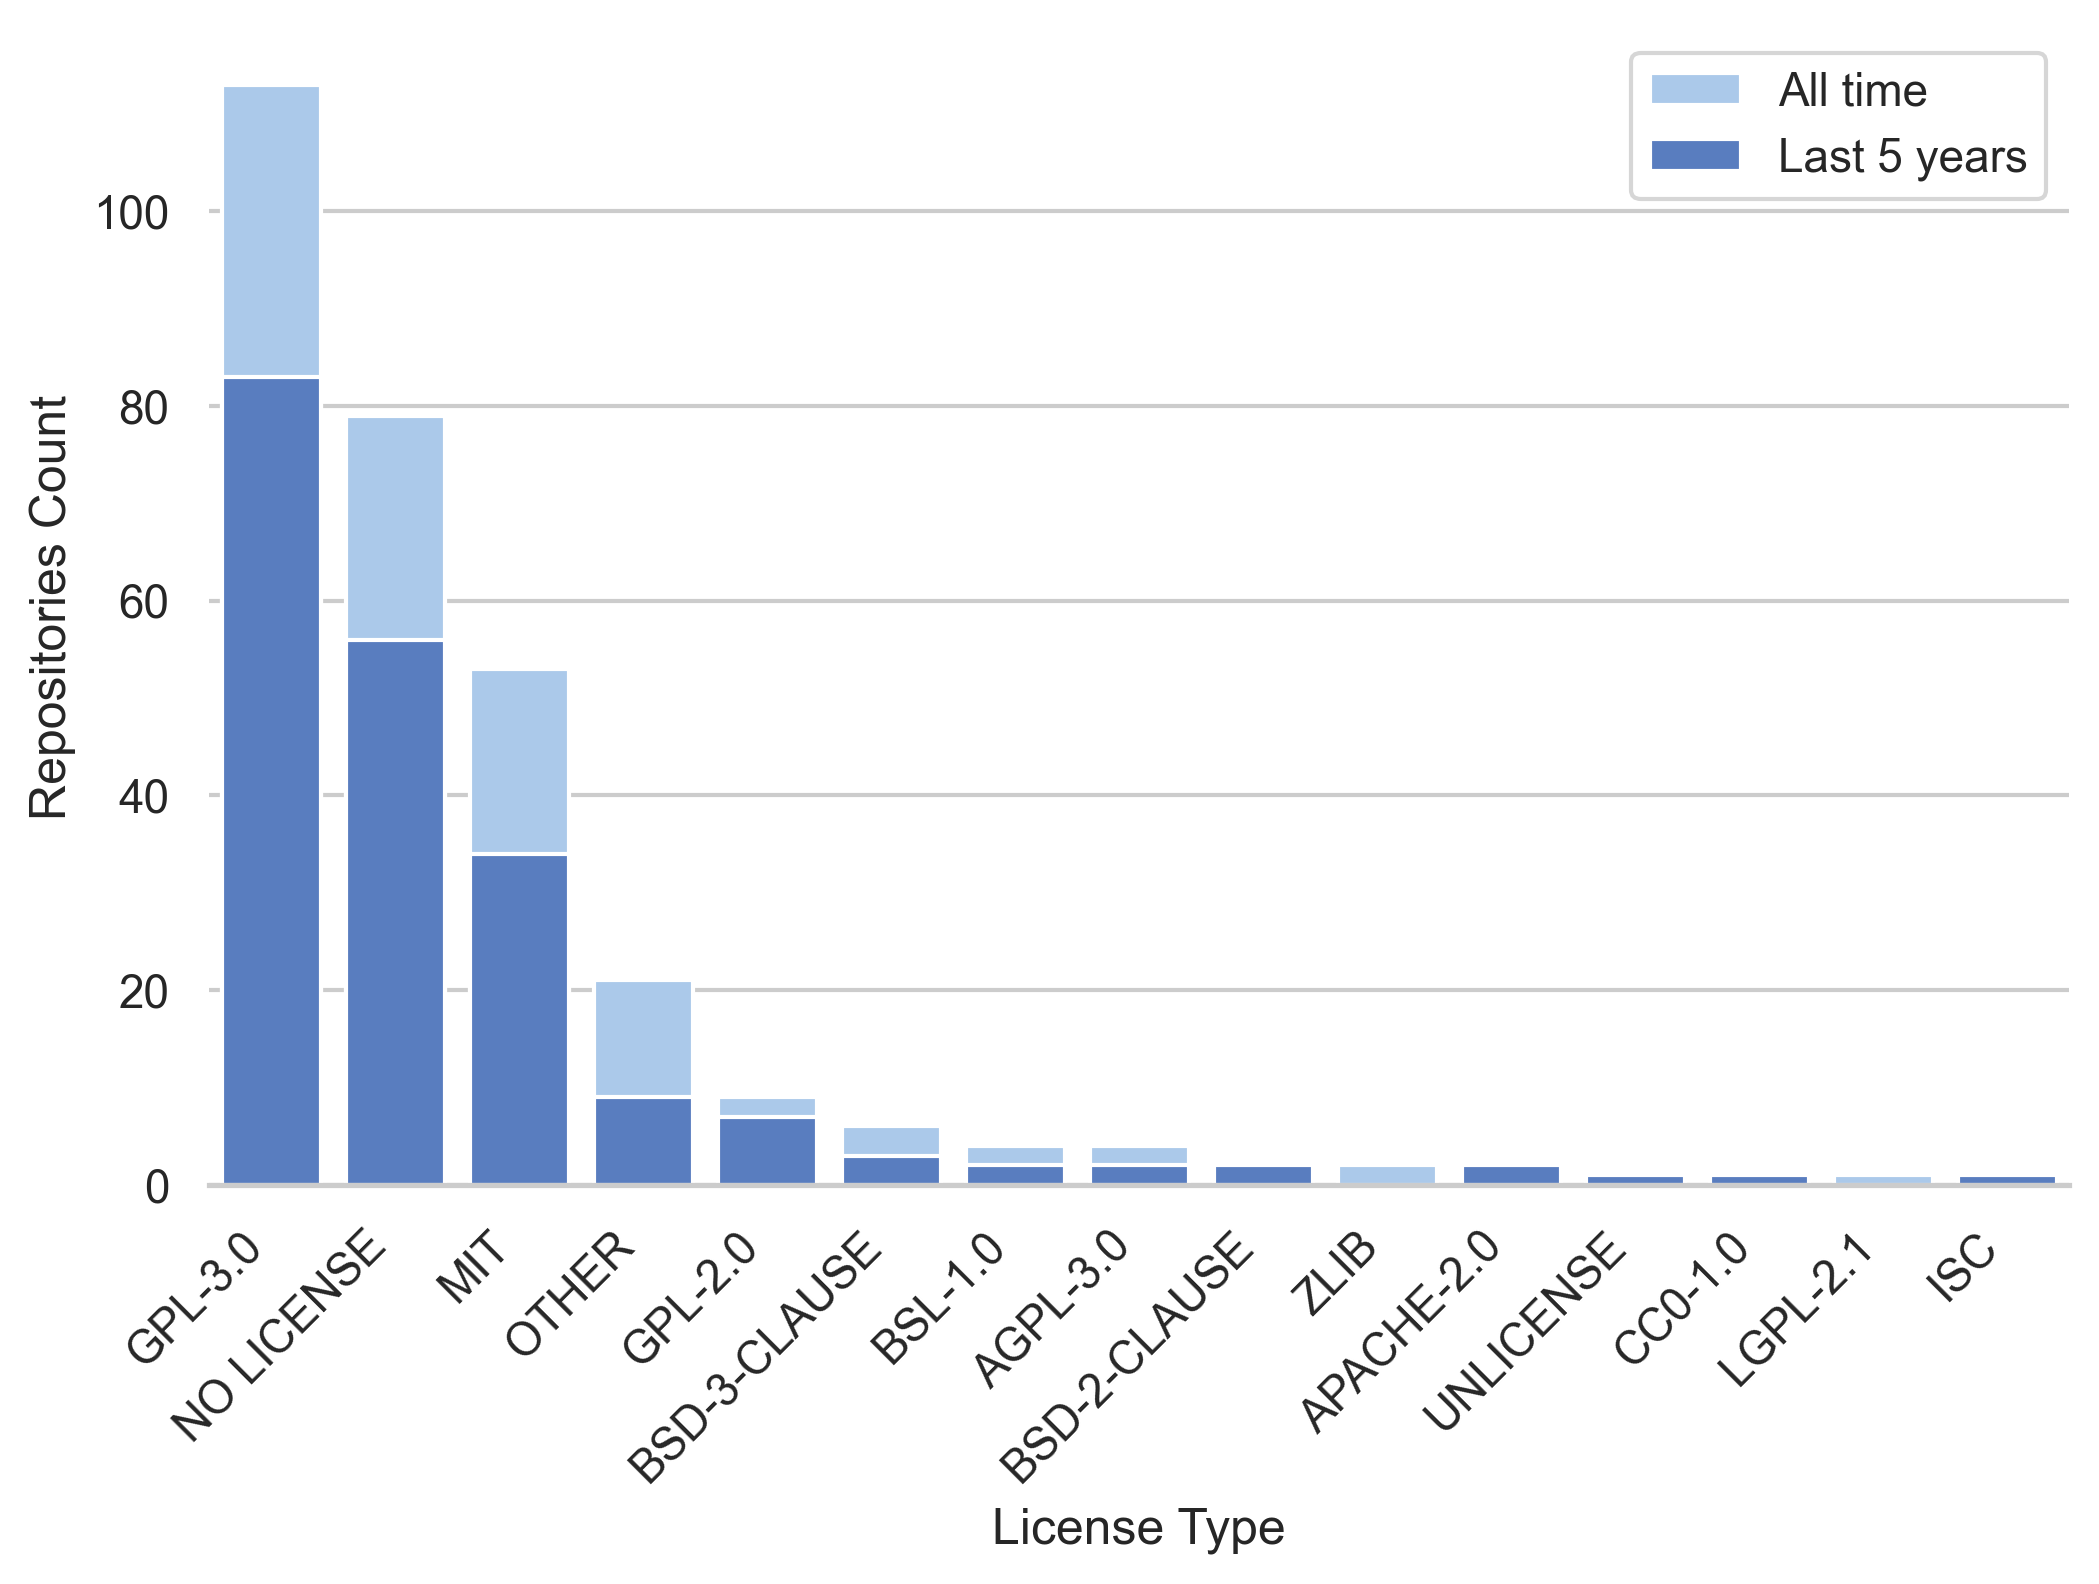

In [450]:
df_license = df_repositories.copy()
df_license['license.key'] = df_license['license.key'].str.upper()
df_license['count'] = df_license.index
df_license.sort_values(by='count', ascending=False, inplace=True)
df_license = df_license['license.key'].value_counts()[:20].reset_index()
df_license.columns = ['License Type', 'Repositories Count']

license_5_years = pd.to_datetime(date.today() - datetime.timedelta(days=1827))
df_intermediary_license_5_years = pd.DataFrame(df_repositories[['license.key', 'created_at']])
df_intermediary_license_5_years['license.key'] = df_intermediary_license_5_years['license.key'].str.upper()
df_intermediary_license_5_years['created_at'] =  pd.to_datetime(df_intermediary_license_5_years['created_at'].str.slice(0,10),format='%Y-%m-%d')
df_intermediary_license_5_years = df_intermediary_license_5_years.sort_values(['created_at'])
df_intermediary_license_5_years = df_intermediary_license_5_years[df_intermediary_license_5_years['created_at']>=till_5_years]

df_license_5_years = df_intermediary_license_5_years['license.key'].value_counts()[:20].reset_index()
df_license_5_years.columns = ['License Type', 'Repositories Count']


sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 5), dpi=300)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="License Type", y="Repositories Count", data=df_license,
            label="All time", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="License Type", y="Repositories Count", data=df_license_5_years,
            label="Last 5 years", color="b")

plt.xticks(rotation=45, ha='right')
sns.despine(left=True, bottom=False)
f.savefig('barplot_license.png',bbox_inches = 'tight')


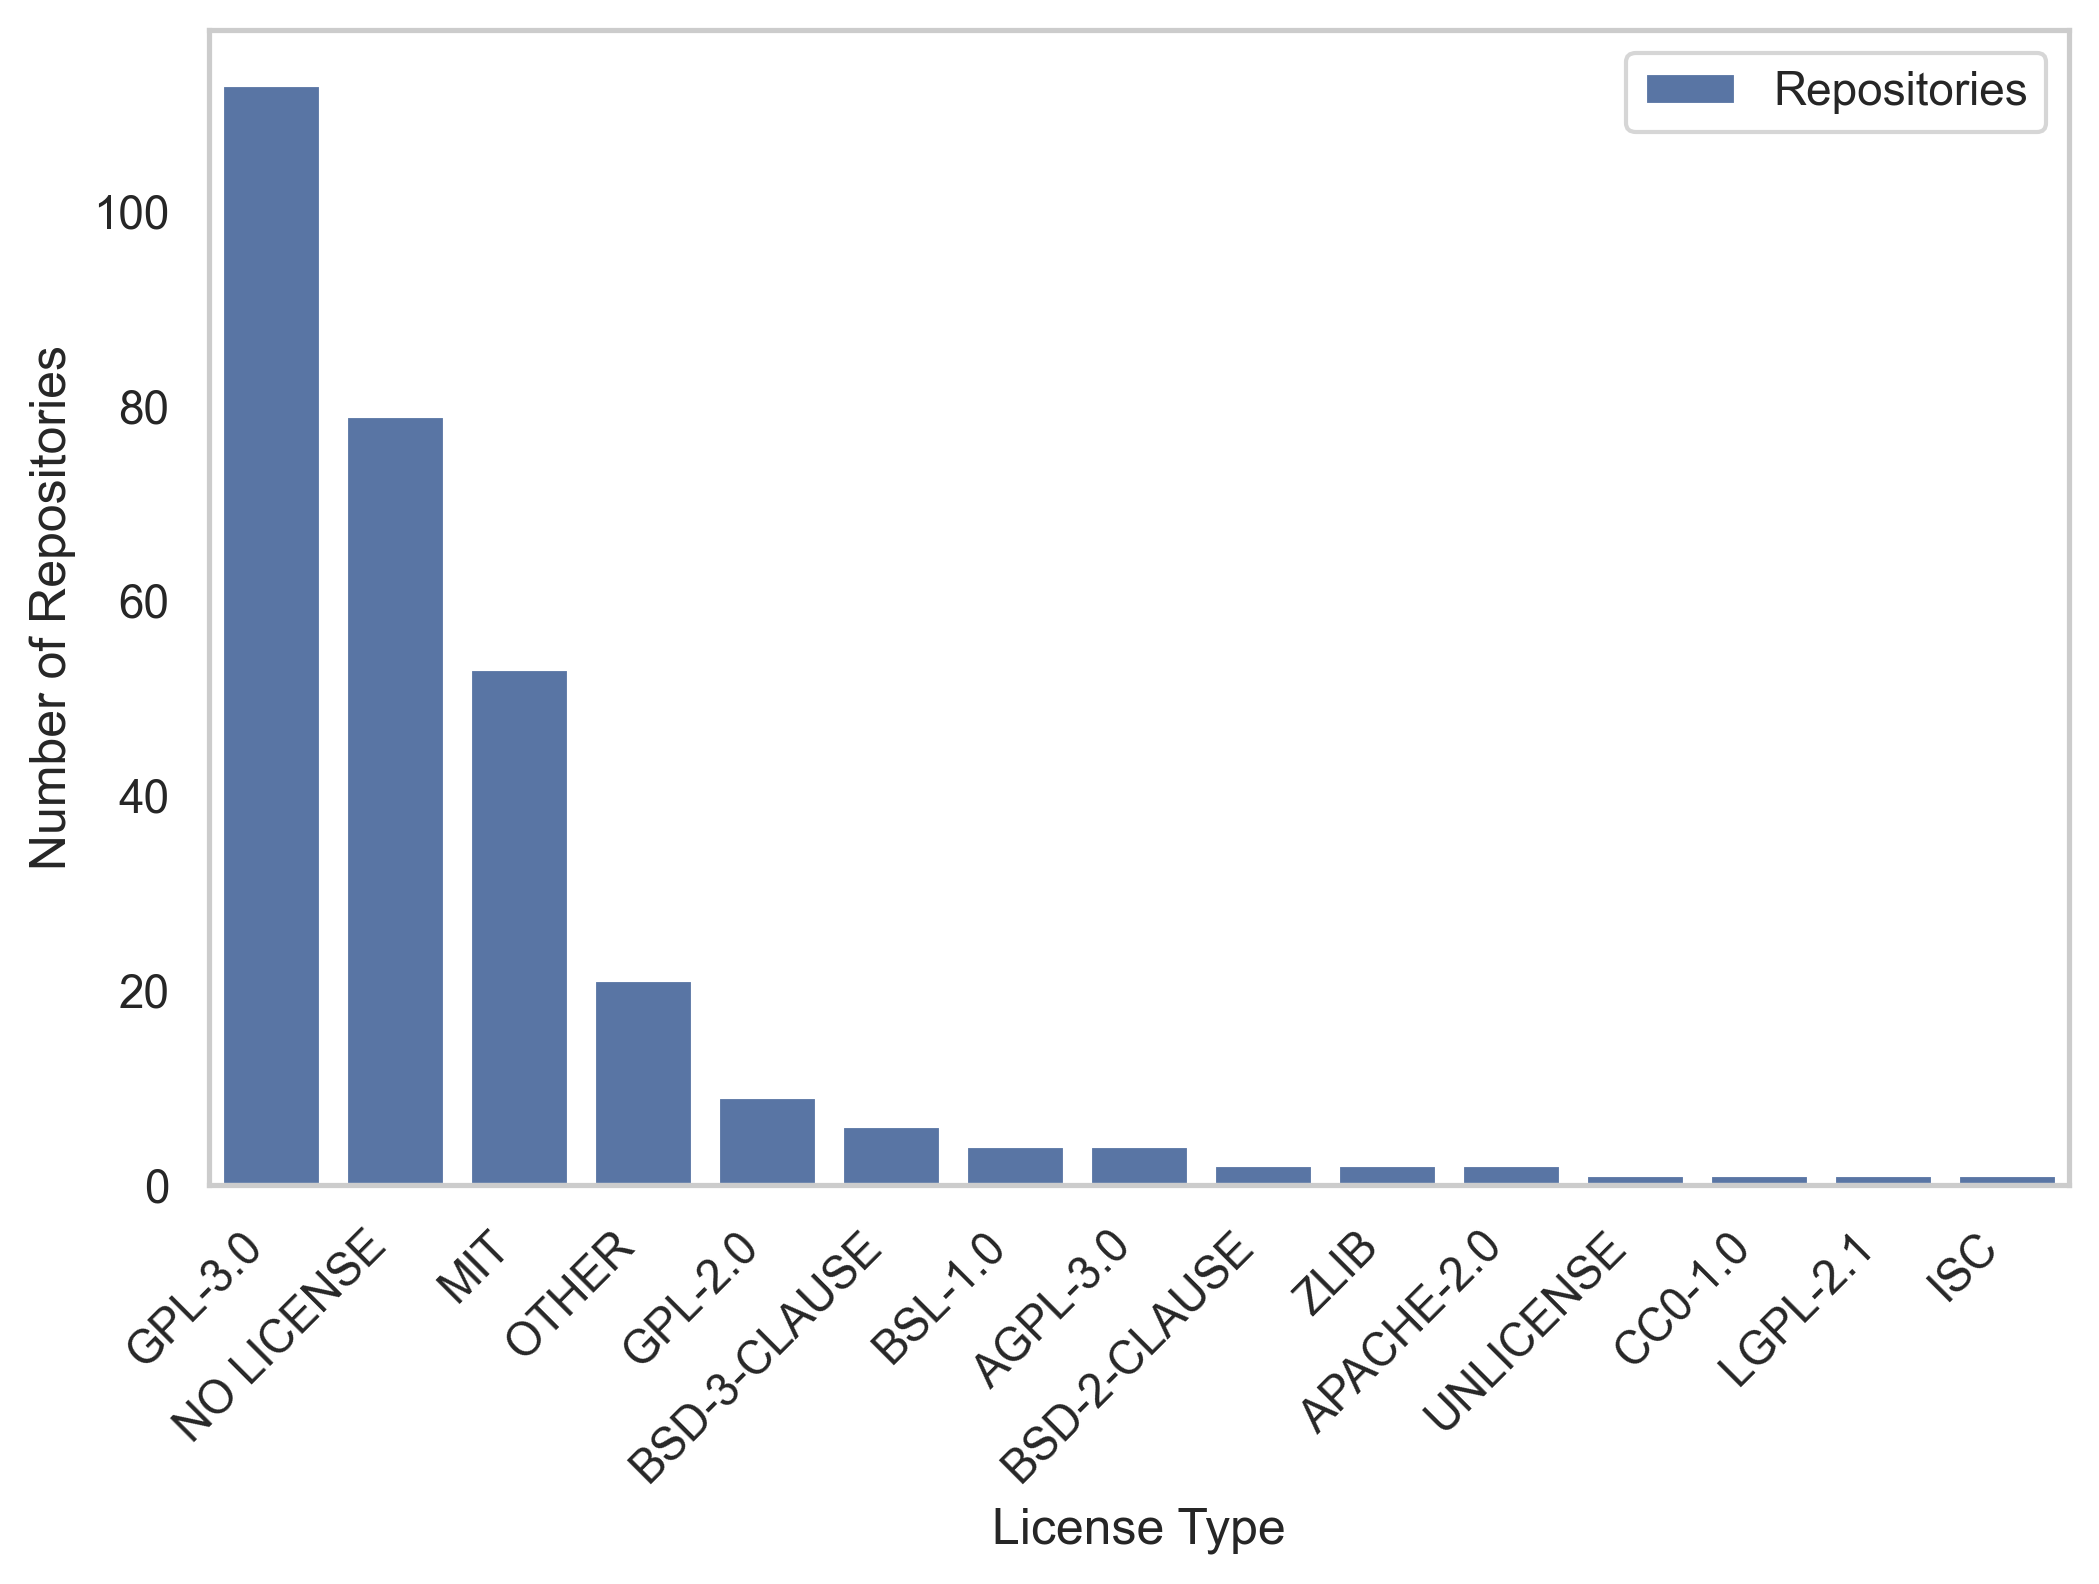

In [427]:

f, ax = plt.subplots(figsize=(8, 5), dpi=300)
plot = sns.countplot(data=df_license, x="license.key", label="Repositories", order=df_license['license.key'].value_counts().index)
plot.set_xlabel('License Type')
plot.set_ylabel('Number of Repositories')
ax.grid(False)
# sns.set_style("whitegrid", {'axes.grid' : True})
plt.xticks(rotation=45, ha='right')
f.savefig('license.png',bbox_inches = 'tight')

In [535]:
df_repositories[['commits_number', 'forks_count', 'contributors_number', 'stargazers_count', 'subscribers_count', 'open_pull_requests', 'closed_pull_requests']].describe().applymap(lambda x: f"{x:0.2f}")

/var/folders/rm/jpz9s5s53h1gyb3l6pg_h57r0000gn/T/ipykernel_30492/2982215494.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_repositories[['commits_number', 'forks_count', 'contributors_number', 'stargazers_count', 'subscribers_count', 'open_pull_requests', 'closed_pull_requests']].describe().applymap(lambda x: f"{x:0.2f}")


,commits_number,forks_count,contributors_number,stargazers_count,subscribers_count,open_pull_requests,closed_pull_requests
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,58.79,6.20,1.57,75.84,1.77,0.16,17.03
std,355.51,27.43,4.32,331.83,9.76,0.70,250.67
min,1.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,1.00,2.00,0.00,0.00,0.00
50%,1.00,1.00,1.00,6.00,0.00,0.00,0.00
75%,1.00,3.00,1.00,30.00,0.00,0.00,0.00
max,4740.00,341.00,68.00,3847.00,128.00,7.00,4330.00


In [572]:
# users' age
df_users['created_at'] = pd.to_datetime(df_users['created_at']).dt.tz_localize(None)
current_date = pd.Timestamp.now().tz_localize(None)
df_users['contributors_age_days'] = (current_date - df_users['created_at']).dt.days
df_users['contributors_age_days'].describe()

count     418.000000
mean     3281.311005
std      1306.232418
min       368.000000
25%      2189.500000
50%      3414.500000
75%      4278.250000
max      6040.000000
Name: contributors_age_days, dtype: float64

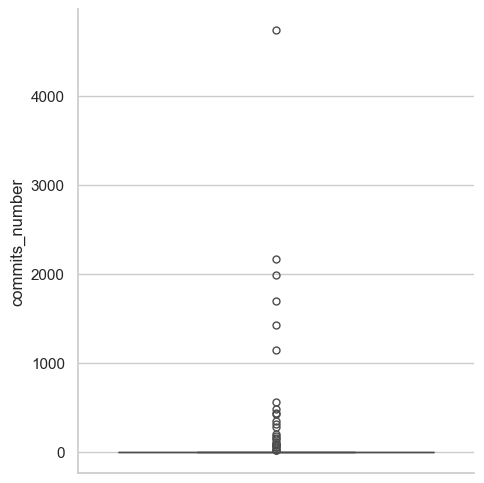

In [499]:
sns.catplot(
    data=df_repositories['commits_number'],
    kind="box",#bw_adjust=.5, cut=0
)

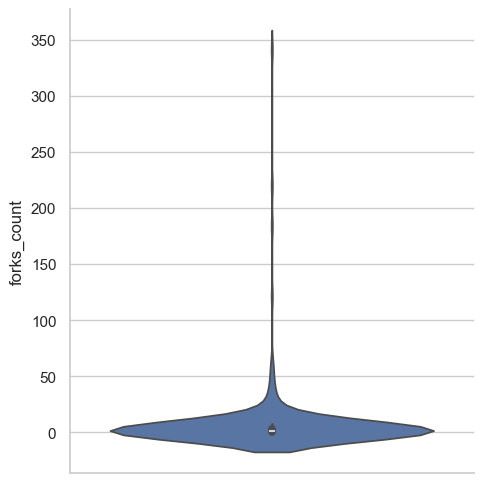

In [502]:
sns.catplot(
    data=df_repositories['forks_count'],
    kind="violin",#bw_adjust=.5, cut=0
)

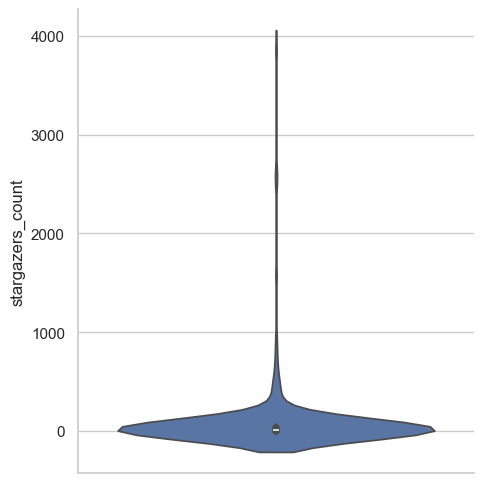

In [507]:
sns.catplot(
    data=df_repositories['stargazers_count'],
    kind="violin",#bw_adjust=.5, cut=0
)

In [516]:
df_repositories[df_repositories['subscribers_count']<100]['subscribers_count'].describe()

count    298.000000
mean       1.342282
std        6.464898
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       67.000000
Name: subscribers_count, dtype: float64

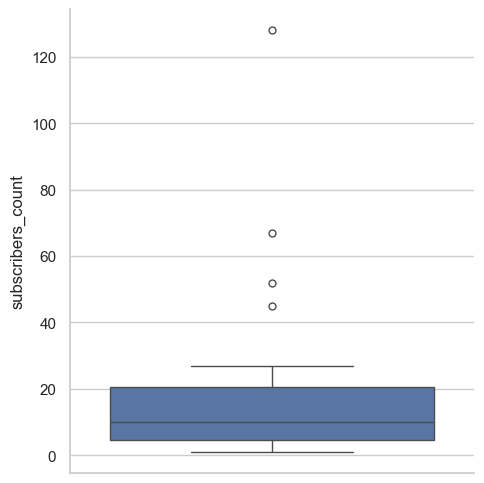

In [528]:
sns.catplot(
    data=df_repositories[df_repositories['subscribers_count']>0]['subscribers_count'],
    kind="box",#bw_adjust=.5, cut=0
)

<Axes: xlabel='stargazers_count', ylabel='Count'>

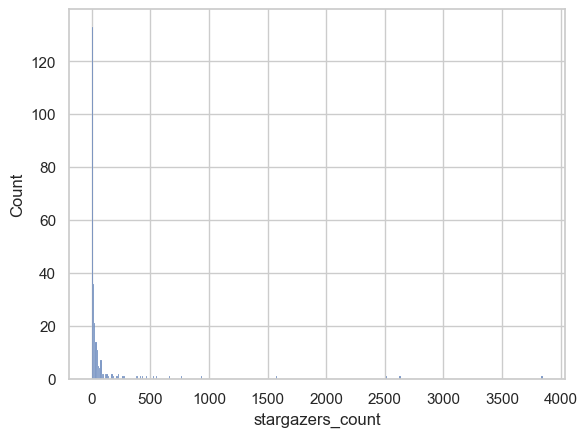

In [577]:
sns.histplot(data=df_repositories[df_repositories['stargazers_count']>0]['stargazers_count'])

<Axes: xlabel='subscribers_count', ylabel='Count'>

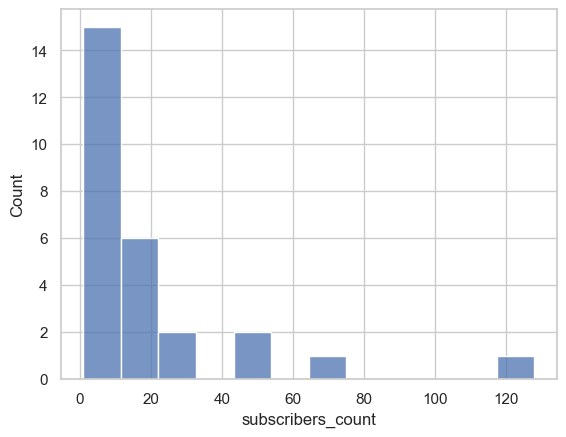

In [526]:
sns.histplot(data=df_repositories[df_repositories['subscribers_count']>0]['subscribers_count'])

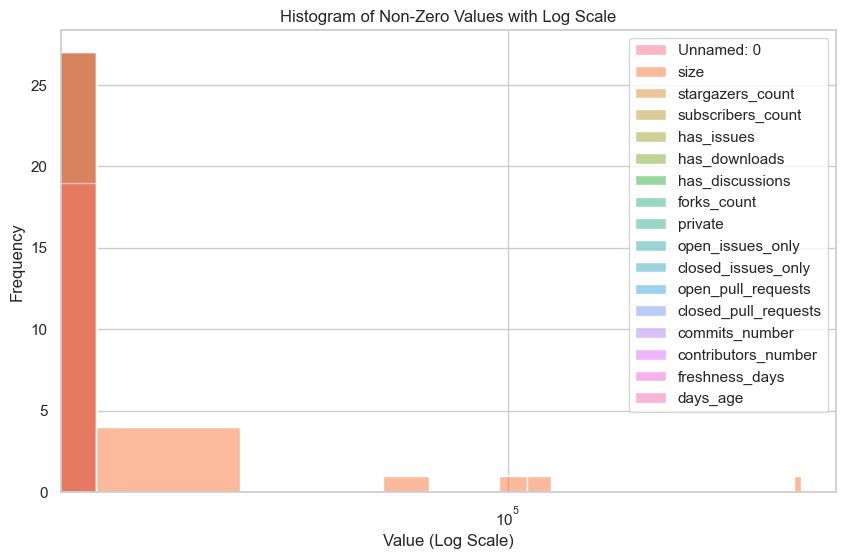

In [530]:
non_zero_data = df_repositories[df_repositories['subscribers_count'] > 0]

# Plot histogram with log-scale x-axis
plt.figure(figsize=(10, 6))
sns.histplot(non_zero_data, bins=30, kde=False)
plt.xscale('log')
plt.title('Histogram of Non-Zero Values with Log Scale')
plt.xlabel('Value (Log Scale)')
plt.ylabel('Frequency')
plt.show()

In [534]:
df_repositories.head()

,Unnamed: 0,html_url,name,full_name,description,topics,created_at,updated_at,pushed_at,size,...,hf_or_clf,comments,cyclomatic_complexity,cognitive_complexity,libraries,issue_type,bot_vs_human_ci,bot_vs_human_cpr,ttfr_median,ttfr_average
0,0,https://github.com/klknn/kdr,kdr,klknn/kdr,klknn dplug repository,"['audio-processing', 'audio-units', 'dlang', '...",2022-09-24T06:38:43Z,2023-04-04T18:36:29Z,2023-06-25T15:29:30Z,3337,...,Header files,19.10%,550,533,NaN,"bug, enhancement",Human,Human,3:35 h,3:35 h
1,5,https://github.com/hansen-audio/renegate-fx,renegate-fx,hansen-audio/renegate-fx,VST 3 Trancegate Effect,"['audio', 'audio-processing', 'cmake', 'cpp', ...",2021-05-16T09:57:18Z,2023-08-26T22:27:02Z,2023-08-06T20:35:13Z,151,...,Header files,52.73%,667,569,NaN,NaN,NaN,NaN,NaN,NaN
2,7,https://github.com/Wasted-Audio/wstd-eq,wstd-eq,Wasted-Audio/wstd-eq,Simple nasty EQ plugin.,"['clap', 'dpf', 'imgui', 'jack', 'lv2', 'plugi...",2023-01-31T21:19:12Z,2023-09-02T03:23:21Z,2023-09-06T11:39:18Z,164,...,Header files,9.32%,140,74,NaN,help wanted,NaN,NaN,NaN,NaN
3,11,https://github.com/AnClark/Minaton-XT,Minaton-XT,AnClark/Minaton-XT,"DPF port of Minaton, an analogue style synthes...","['audio', 'clap', 'lv2', 'plugin', 'synthesize...",2023-01-21T05:58:23Z,2023-08-24T05:00:29Z,2023-09-14T12:52:50Z,2610,...,Header files,18.21%,231,191,NaN,NaN,NaN,NaN,NaN,NaN
4,12,https://github.com/xivilay/scale-remapper,scale-remapper,xivilay/scale-remapper,Routes white keys from midi-input to chosen sc...,"['blocks', 'lumi', 'lumi-keys', 'lv2', 'midi',...",2021-11-15T19:39:02Z,2023-04-29T01:17:51Z,2023-02-25T16:09:07Z,259,...,Header files,0.00%,110,82,NaN,enhancement,NaN,NaN,NaN,NaN


## Contributors

In [578]:
df_contributors = pd.read_csv('CSVs Used//contributors_details.csv')

In [587]:
df_mega_contributor = pd.DataFrame(df_contributors['login'])
df_mega_contributor.value_counts().describe()

count    419.000000
mean       1.248210
std        1.019178
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       12.000000
Name: count, dtype: float64

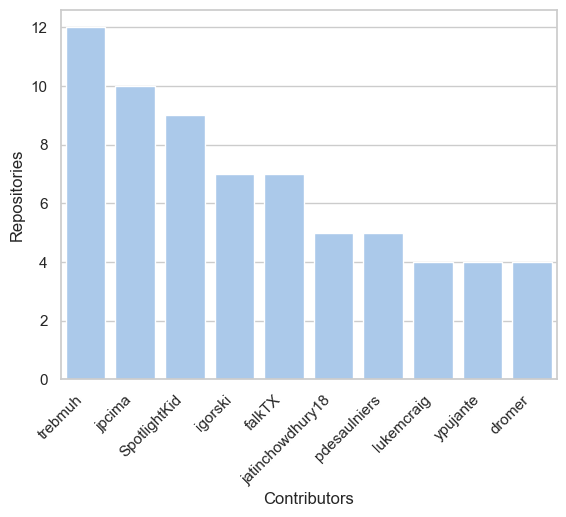

In [628]:
sns.set_color_codes("pastel")
top_10_mega = df_mega_contributor.value_counts()[:10].reset_index()
top_10_mega.columns = ['Contributors', 'Repositories']
sns.barplot(top_10_mega, x= 'Contributors', y='Repositories', color='b')
plt.xticks(rotation=45, ha='right')
plt.savefig('mega-contributor.png',bbox_inches = 'tight')

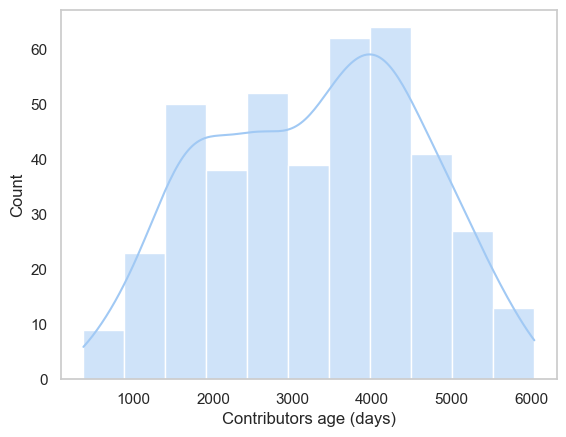

In [697]:
sns.set_style("whitegrid", {'axes.grid' : False})
df_users_his = df_users['contributors_age_days']
sns.histplot(df_users_his, kde=True, color='b')
plt.xlabel("Contributors age (days)")
plt.savefig('contributors-age.png',bbox_inches = 'tight')

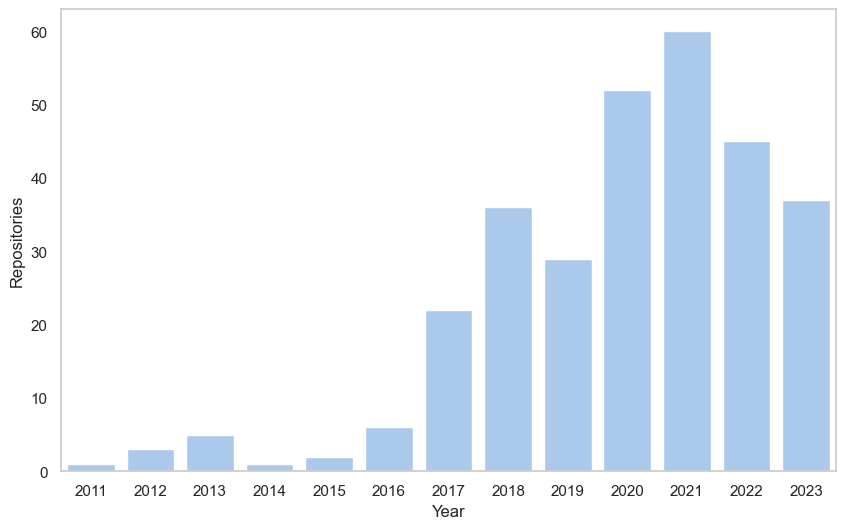

In [688]:
df_repositories['year_creation'] = pd.to_datetime(df_repositories['created_at']).dt.tz_localize(None)
df_repositories['year_creation'] = pd.DatetimeIndex(df_repositories['year_creation']).year

fig, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes("pastel")
year_creation = df_repositories['year_creation'].value_counts().reset_index()
year_creation.columns = ['Year', 'Repositories']
sns.barplot(year_creation, x= 'Year', y='Repositories', color='b')
plt.savefig('repo_per_year.png',bbox_inches = 'tight')

In [694]:
df_repositories[['size', 'days_age', 'freshness_days']].describe().applymap(lambda x: f"{x:0.2f}")

/var/folders/rm/jpz9s5s53h1gyb3l6pg_h57r0000gn/T/ipykernel_30492/2873520093.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_repositories[['size', 'days_age', 'freshness_days']].describe().applymap(lambda x: f"{x:0.2f}")


,size,days_age,freshness_days
count,299.00,299.00,299.00
mean,21559.41,996.04,644.87
std,66325.79,882.55,666.01
min,1.00,0.00,13.00
25%,253.50,265.50,119.50
50%,2081.00,818.00,431.00
75%,10194.00,1456.00,950.50
max,647857.00,4356.00,3168.00


In [696]:
top_10_mega

,Contributors,Repositories
0,trebmuh,12
1,jpcima,10
2,SpotlightKid,9
3,igorski,7
4,falkTX,7
5,jatinchowdhury18,5
6,pdesaulniers,5
7,lukemcraig,4
8,ypujante,4
9,dromer,4
